In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import plotly.express as px

In [3]:
adult_df = pd.read_csv('C:/Users/nickn/OneDrive/Desktop/Capstone Project/capstone/data/adult.data', header=None, na_values=" ?")

adult_df.columns = ["age", "workclass", "fnlwgt", "education", "education-num", 
                      "marital-status", "occupation", "relationship", "race", "sex",
                      "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary"]

In [4]:
state_wage_stats = pd.read_excel('C:/Users/nickn/OneDrive/Desktop/Capstone Project/capstone/data/state_M2023_dl.xlsx')

In [31]:
population = pd.read_csv('C:/Users/nickn/OneDrive/Desktop/Capstone Project/capstone/data/NST-EST2023-ALLDATA.csv')

In [4]:
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
state_wage_stats.head()

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,19.88,30.09,46.18,22620,29580,41350,62580,96050,NaN,NaN
1,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,47.95,67.22,95.44,50710,73180,99740,139810,198520,NaN,NaN
2,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-1011,Chief Executives,...,79.48,102.01,#,65700,123960,165320,212180,#,NaN,NaN
3,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-1021,General and Operations Managers,...,49.67,78.25,112.54,48080,72260,103320,162760,234080,NaN,NaN
4,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-1031,Legislators,...,*,*,*,18320,19670,24470,45050,55070,True,NaN


In [32]:
population.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,POPESTIMATE2023,...,RNATURALCHG2023,RINTERNATIONALMIG2021,RINTERNATIONALMIG2022,RINTERNATIONALMIG2023,RDOMESTICMIG2021,RDOMESTICMIG2022,RDOMESTICMIG2023,RNETMIG2021,RNETMIG2022,RNETMIG2023
0,10,0,0,0,United States,331464948,331526933,332048977,333271411,334914895,...,1.510043,1.133278,3.003867,3.409196,0.000000,0.000000,0.000000,1.133278,3.003867,3.409196
1,20,1,0,0,Northeast Region,57614141,57430477,57243423,57026847,56983517,...,0.976280,1.403074,3.678035,3.947167,-4.823207,-7.881683,-5.671414,-3.420133,-4.203648,-1.724247
2,30,1,1,0,New England,15119994,15057898,15106108,15120739,15159777,...,-0.019551,1.772643,4.532659,5.024221,1.615767,-3.086263,-2.445863,3.388409,1.446396,2.578358
3,30,1,2,0,Middle Atlantic,42494147,42372579,42137315,41906108,41823740,...,1.336417,1.271165,3.370662,3.557656,-7.121462,-9.606391,-6.837920,-5.850297,-6.235729,-3.280264
4,20,2,0,0,Midwest Region,68987296,68969794,68850246,68783028,68909283,...,0.665803,0.802684,2.098649,2.409866,-2.577042,-2.636615,-1.245226,-1.774357,-0.537966,1.164640


In [6]:
# check and then drop NA values for adult.data
adult_df.dropna(inplace=True)


print(adult_df.isna().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64


In [6]:
print(state_wage_stats.isna().sum())

AREA                0
AREA_TITLE          0
AREA_TYPE           0
PRIM_STATE          0
NAICS               0
NAICS_TITLE         0
I_GROUP             0
OWN_CODE            0
OCC_CODE            0
OCC_TITLE           0
O_GROUP             0
TOT_EMP             0
EMP_PRSE            0
JOBS_1000           0
LOC_QUOTIENT        0
PCT_TOTAL       37676
PCT_RPT         37676
H_MEAN              0
A_MEAN              0
MEAN_PRSE           0
H_PCT10             0
H_PCT25             0
H_MEDIAN            0
H_PCT75             0
H_PCT90             0
A_PCT10             0
A_PCT25             0
A_MEDIAN            0
A_PCT75             0
A_PCT90             0
ANNUAL          35034
HOURLY          37517
dtype: int64


Question 1:

In [8]:
# visualize levels of education
adult_df[['education', 'education-num']].value_counts()

education     education-num
HS-grad       9                9840
Some-college  10               6678
Bachelors     13               5044
Masters       14               1627
Assoc-voc     11               1307
11th          7                1048
Assoc-acdm    12               1008
10th          6                 820
7th-8th       4                 557
Prof-school   15                542
9th           5                 455
12th          8                 377
Doctorate     16                375
5th-6th       3                 288
1st-4th       2                 151
Preschool     1                  45
Name: count, dtype: int64

In [9]:
# organize lists for education categories
preschool = [1]
primary = [2, 3]
secondary = [4, 5, 6, 7, 8, 9]
higher = [10, 11, 12, 13, 14, 15, 16]

def get_categories(number):
    '''
    Check if a numerical category is part of the 4 education groups.
    '''
    if number in preschool:
        return "Preschool"
    elif number in primary:
        return "Primary"
    elif number in secondary:
        return "Secondary"
    else:
        return "Higher"

# use get_categories function to create a new column with education categories
adult_df['education_category'] = adult_df['education-num'].apply(get_categories)
    

In [10]:
# scatterplot (1st visual for Question 1)
# MAKE SURE TO CHANGE ALPHA VALUE
px.scatter(adult_df, x='age', y='hours-per-week', color='education_category', title='Hours Worked Per Week against Employee Age',
           labels={
               'age': 'Age',
               'hours-per-week': 'Hours Per Week'
           },
           opacity=0.1,
           trendline='ols')

In [11]:
adult_df["age_decade"] = ((adult_df["age"]) // 10) * 10

In [17]:
mean_hours = adult_df.groupby(["age_decade", "education_category"])["hours-per-week"].mean().reset_index()

# drop Preschool category if needed
drop_preschool = mean_hours[mean_hours['education_category'] != 'Preschool']

# Create line plot using Plotly Express
fig = px.line(drop_preschool, x="age_decade", y="hours-per-week", color="education_category",
              title="<b>Mean Hours Worked Per Week Against Employee Age</b>",
              labels={"age_decade": "Age", "hours-per-week": "Mean Hours Per Week", "education_category": "Education Level"},
              markers=True)

fig.update_layout(
    font=dict(
        color='black'
    ))

fig.show()

In [18]:
mean_hours

,age_decade,education_category,hours-per-week
0,10,Higher,25.889535
1,10,Preschool,36.000000
2,10,Primary,44.500000
3,10,Secondary,26.210059
4,20,Higher,37.809255
5,20,Preschool,35.200000
6,20,Primary,39.918367
7,20,Secondary,40.442623
8,30,Higher,44.134863
9,30,Preschool,36.800000


In [19]:
# boxplot for 2nd visual
fig = px.box(adult_df, x="salary", y="hours-per-week", color="education_category", 
             labels={
                     "education_category": "Education Level",
                     "salary": "Salary Category",
                     "hours-per-week": "Hours Worked per Week"
                 },
             title="Weekly Hours Against Salary Category")
fig.show()

### Question 2

Is there a noticable trend between a person’s salary and their sex? What about their
race?

In [107]:
# Q2 Part 1)

# calculate total count of salary category by sex
counts = adult_df.groupby(['sex', 'salary']).size().reset_index(name='count')

# stacked bar chart
fig_2a = px.bar(counts, x='sex', y='count', color='salary',
                title="<b>Salary Levels Between Females and Males</b>")

fig.update_layout(
    plot_bgcolor='lightgray',   # Background of the plot area
    paper_bgcolor='lightgray',   # Background outside the plot area
    font=dict(
        color='black'
    ))

fig.update_layout(
     #plot_bgcolor='white',   # Background of the plot area
     #paper_bgcolor='lightgray',   # Background outside the plot area
     font=dict(
         color='black'
     )
 )

fig_2a.show()

In [17]:
# 100% filled bar chart

# calculate percent of total sex occurences that belong to a salary category
counts['percentage'] = counts.groupby('sex')['count'].transform(lambda x: (x / sum(x)) * 100)

# plot filled bar chart
fig_2b = px.bar(counts, x='sex', y='percentage', color='salary',
                title="Pecentage of Salary Levels Between Females and Males")
fig_2b.show()

In [18]:
# race occurences
race_counts = adult_df.groupby(['race', 'salary']).size().reset_index(name='count')
race_counts['percentage'] = race_counts.groupby('race')['count'].transform(lambda x: (x / sum(x)) * 100)

fig_2c = px.bar(race_counts, x='race', y='count', color='salary',
                title="Salary Levels Between Races")
fig_2c.show()

fig_2d = px.bar(race_counts, x='race', y='percentage', color='salary',
                title="Percentage of Salary Levels Between Races")
fig_2d.show()

Question 3:

In [8]:
# machine learning
# import packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [9]:
# prepare adult_df data for regression

# split to features and target
features = adult_df.drop("salary", axis=1)
target = adult_df["salary"]

# one-hot encode categorical features
features = pd.get_dummies(features, drop_first=True)

In [10]:
# split data 70/30 train/test
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [11]:
# standardize numerical features
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

In [12]:
# fit model
model = LogisticRegression()
model.fit(features_train, target_train)

LogisticRegression()

In [13]:
predictions = model.predict(features_test)

print("Accuracy:\n", accuracy_score(predictions, target_test))

print("")

print("Classification Report:\n", classification_report(target_test, predictions))

Accuracy:
 0.8508122444469002

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      6767
        >50K       0.75      0.61      0.67      2282

    accuracy                           0.85      9049
   macro avg       0.81      0.77      0.79      9049
weighted avg       0.84      0.85      0.85      9049



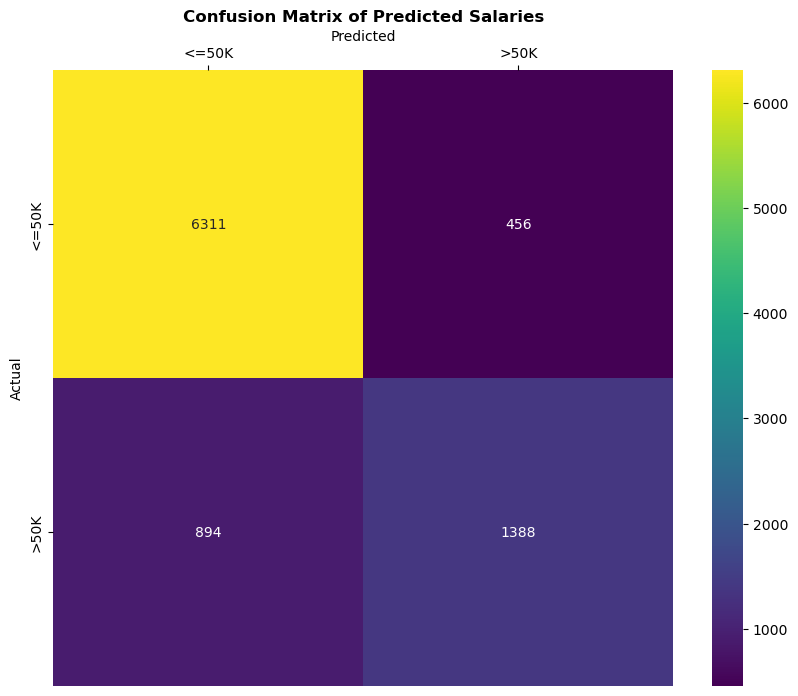

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(target_test, predictions)

labels = ["<=50K", ">50K"]

plt.figure(figsize=(10, 8))

matrix = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=sns.color_palette("viridis", as_cmap=True), xticklabels=labels, yticklabels=labels)

matrix.xaxis.set_ticks_position("top")  # Move x-axis to top
matrix.xaxis.set_label_position("top")  
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Predicted Salaries", weight='bold')

plt.show()

In [15]:
# Feature importance (absolute values)
feature_importance = np.abs(model.coef_[0])

importance_df = pd.DataFrame({"Feature": features.columns, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

In [16]:
# combine one-hot encoded features into the original feature
importance_df["Original Feature"] = importance_df["Feature"].str.split("_").str[0]
aggregated_importance = importance_df.groupby("Original Feature")["Importance"].sum()
aggregated_importance = aggregated_importance.sort_values(ascending=False)

In [103]:
# feature importance bar plot
top_5 = aggregated_importance[:6].sort_values(ascending=False).reset_index()
top_5.columns = ['Original Feature', 'Value']

# Create the bar plot
fig = px.bar(
    top_5,
    x='Value',
    y='Original Feature',
    orientation='h',
    title="<b>Absolute Feature Importances</b>",
    labels={
        "Original Feature": "Absolute Feature",
        "Value": "Coefficient Value"
    },
    category_orders={
        "Original Feature": top_5['Original Feature'].tolist()
    }
)

# fig.update_layout(
#     plot_bgcolor='white',   # Background of the plot area
#     paper_bgcolor='lightgray',   # Background outside the plot area
#     font=dict(
#         color='black'
#     )
# )

fig.show()

Question 4:

Which US state has the greatest average annual wage and hourly wage?

In [7]:
# filter state_wage_stats to only have rows with 'All Occupations' and contain US states
filt_state_df = state_wage_stats[state_wage_stats['OCC_TITLE'].str.contains('All Occupations', case=False, na=False)]
us_filt_state = filt_state_df[filt_state_df['AREA_TYPE'] == 2]

In [8]:
us_filt_state['A_MEAN'] = pd.to_numeric(us_filt_state['A_MEAN'])
us_filt_state['H_MEAN'] = pd.to_numeric(us_filt_state['H_MEAN'])

C:\Users\nickn\AppData\Local\Temp\ipykernel_13528\1939442581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_filt_state['A_MEAN'] = pd.to_numeric(us_filt_state['A_MEAN'])
C:\Users\nickn\AppData\Local\Temp\ipykernel_13528\1939442581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_filt_state['H_MEAN'] = pd.to_numeric(us_filt_state['H_MEAN'])


In [9]:
# Bar plot of top 10 states with highest mean hourly and annual wages
top_10_states = us_filt_state[['AREA_TITLE', 'A_MEAN', 'H_MEAN']].sort_values(by="A_MEAN", ascending=False).head(10)

In [10]:
us_filt = state_wage_stats[state_wage_stats['AREA_TYPE'] == 2]


us_filt['A_MEAN'] = pd.to_numeric(us_filt['A_MEAN'], errors="coerce")
us_filt['H_MEAN'] = pd.to_numeric(us_filt['H_MEAN'], errors="coerce")
top_10_prof = us_filt[['AREA_TITLE', 'OCC_TITLE', 'A_MEAN', 'H_MEAN']].sort_values(by="A_MEAN", ascending=False).head(10)

C:\Users\nickn\AppData\Local\Temp\ipykernel_13528\1821889120.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_filt['A_MEAN'] = pd.to_numeric(us_filt['A_MEAN'], errors="coerce")
C:\Users\nickn\AppData\Local\Temp\ipykernel_13528\1821889120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_filt['H_MEAN'] = pd.to_numeric(us_filt['H_MEAN'], errors="coerce")


In [24]:
fig_4a = px.bar(top_10_states, x='AREA_TITLE', y='H_MEAN',
                   #r='H_MEAN',  # Radius (wage value)
                   #theta='AREA_TITLE',  # Angle (categories)
                   #color='H_MEAN',  # Color based on wages
                   #color_continuous_scale='Blues',
                   title="Top 10 Mean Hourly Wages in the US",
                   labels={
                       'AREA_TITLE':'State',
                       'H_MEAN': 'Hourly Salary in USD'
                   })

# Show the figure
fig_4a.show()


fig_5b = px.bar(top_10_states, x='AREA_TITLE', y='A_MEAN',
                   #r='H_MEAN',  # Radius (wage value)
                   #theta='AREA_TITLE',  # Angle (categories)
                   #color='H_MEAN',  # Color based on wages
                   color_continuous_scale='viridis',
                   title="Top 10 Mean Annual Wages in the US",
                   labels={
                       'AREA_TITLE':'State',
                       'A_MEAN': 'Annual Salary in USD'
                   })

# Show the figure
fig_5b.show()

In [25]:
# for mean hourly wage
fig_4map_a = px.choropleth(
    us_filt_state,
    locations="PRIM_STATE", 
    locationmode="USA-states",  # Use U.S. states
    color="H_MEAN",  # Value to color by
    #hover_name="AREA_TITLE",  # Display state name on hover
    color_continuous_scale="Reds",  # Color scale
    scope="usa",  # Focus on the USA
    title="Mean Hourly Salary By State",
    labels={"H_MEAN":"Hourly Wage", 
            "PRIM_STATE":"State"}
)

fig_4map_a.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  width=800, 
                  height=500)

fig_4map_a.show()

# for mean annual wage
fig_4map_b = px.choropleth(
    us_filt_state,
    locations="PRIM_STATE", 
    locationmode="USA-states",  # Use U.S. states
    color="A_MEAN",  # Value to color by
    color_continuous_scale="Blues",
    scope="usa",
    title="Mean Annual Salary By State",
    labels={"A_MEAN":"Annual Wage", 
            "PRIM_STATE":"State"}
)

fig_4map_b.show()

Question 5

###### Do high employment levels indicate high salaries?
- Plot 1:
    - Normalized map plot of employment rates by state
- Plot 2:
    - Interactive bubble plot showing Total Employment vs. Salary.
        - size of bubble is the mdeian wage

In [64]:
# prep population dataset
state_population = population[population['SUMLEV'] == 40]
state_population = state_population[state_population['NAME'] != 'Puerto Rico']
state_population = state_population.rename(columns={'NAME': 'AREA_TITLE'})

In [90]:
pop_merge = pd.merge(us_filt_state, state_population, on='AREA_TITLE', how='left')

# create column with normalized employment rates
pop_merge['EMPLOYMENT_RATE'] = (pop_merge['TOT_EMP'] / pop_merge['POPESTIMATE2023'])
pop_merge['EMPLOYMENT_RATE'] = pd.to_numeric(pop_merge['EMPLOYMENT_RATE'])

pop_merge['EMPLOYMENT_RATE'] = pop_merge['EMPLOYMENT_RATE'].round(4)

In [91]:
pop_merge['EMPLOYMENT_RATE'].head()

0    0.4019
1    0.4249
2    0.4212
3    0.4144
4    0.4606
Name: EMPLOYMENT_RATE, dtype: float64

In [93]:
# plot 1
fig_5a = px.choropleth(
    pop_merge,
    locations="PRIM_STATE", 
    locationmode="USA-states",  # Use U.S. states
    color="EMPLOYMENT_RATE",
    color_continuous_scale="Viridis",
    scope="usa",
    title="Employment Rate By State",
    labels={"EMPLOYMENT_RATE":"Employment Rate", 
            "PRIM_STATE":"State"}
)

fig_5a.show()

In [ ]:
# Create Bubble Chart
A_filtered = us_filt_state[['PRIM_STATE', 'TOT_EMP', 'A_MEAN', 'A_MEDIAN']].dropna()

A_filtered['TOT_EMP'] = pd.to_numeric(A_filtered['TOT_EMP'], errors='coerce')
A_filtered['A_MEAN'] = pd.to_numeric(A_filtered['A_MEAN'], errors='coerce')
A_filtered['A_MEDIAN'] = pd.to_numeric(A_filtered['A_MEDIAN'], errors='coerce')

fig5_b = px.scatter(A_filtered, 
                 x='TOT_EMP', 
                 y='A_MEAN', 
                 size='A_MEDIAN',  # Bubble size
                 hover_name='PRIM_STATE', 
                 title="US States Annual Wages vs. Total Employment",
                 labels={'TOT_EMP': 'Total Employment', 'A_MEDIAN': 'Annual Median Wage', 'A_MEAN': 'Annual Mean Wage'},
                 size_max=20,  # Limits the max bubble size
                 color='A_MEDIAN'  # Color gradient based on wages
                )   

fig5_b.show()

In [74]:
# Hourly wages
H_filtered = us_filt_state[['PRIM_STATE', 'TOT_EMP', 'H_MEAN', 'H_MEDIAN']].dropna()

H_filtered['TOT_EMP'] = pd.to_numeric(H_filtered['TOT_EMP'], errors='coerce')
H_filtered['H_MEAN'] = pd.to_numeric(H_filtered['H_MEAN'], errors='coerce')
H_filtered['H_MEDIAN'] = pd.to_numeric(H_filtered['H_MEDIAN'], errors='coerce')

fig5_c = px.scatter(H_filtered, 
                 x='TOT_EMP', 
                 y='H_MEAN', 
                 size='H_MEDIAN',  # Bubble size
                 hover_name='PRIM_STATE', 
                 title="US States Hourly Wages vs. Total Employment",
                 labels={'TOT_EMP': 'Total Employment', 'H_MEDIAN': 'Hourly Median Wage', 'H_MEAN': 'Hourly Mean Wage'},
                 size_max=20,
                 color='H_MEDIAN',
                 color_continuous_scale="Viridis"
                )   

fig5_c.show()

In [ ]:
ny_nj_nb = ['NY', 'NJ', 'NE']
nynj_df = state_wage_stats[state_wage_stats['PRIM_STATE'].isin(ny_nj_nb)]
nynj_df = nynj_df[nynj_df['OCC_TITLE'] != 'All Occupations']
nynj_df = nynj_df[nynj_df['JOBS_1000'] != '**']
nynj_df['JOBS_1000'] = nynj_df['JOBS_1000'].astype(int)